### **1. Objective**
WAP to evaluate the performance of implemented three-layer neural network with variations in activation functions, size of hidden layer, learning rate, batch size and number of epochs.


### **2. Description of the Model**
This model is a simple **feedforward neural network (FNN)** and **backpropagation  neural network(BPNN)** designed for classifying handwritten digits from the **MNIST dataset**. The architecture consists of:
- **Input Layer**: 784 neurons (flattened 28×28 grayscale images)
- **Hidden Layer 1** and **Hidden Layer 2**: are varied in range [(160, 100), (100, 100), (100, 160), (60, 60), (100, 60)] with activation function as Relu
- **Output Layer**: 10 neurons (one for each digit 0-9), using raw logits
- **Learning Rate**:is also varied between [0.01, 0.1, 1]
- **Loss Function**: Softmax cross-entropy
- **Optimizer**: Adam Optimizer
- **Performance Metric**: Accuracy,loss curves, confusion matrix

The model is trained for **50 epochs** with batch size = 10.

### **3. Python Implementation**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training with Hidden Layers: 160, 100 | Learning Rate: 0.01
Epoch 1, Loss: 2.3488, Accuracy: 0.1124
Epoch 2, Loss: 2.3488, Accuracy: 0.1124
Epoch 3, Loss: 2.3488, Accuracy: 0.1124
Epoch 4, Loss: 2.3488, Accuracy: 0.1124
Epoch 5, Loss: 2.3638, Accuracy: 0.0974
Epoch 6, Loss: 2.3638, Accuracy: 0.0974
Epoch 7, Loss: 2.3638, Accuracy: 0.0974
Epoch 8, Loss: 2.3638, Accuracy: 0.0974
Epoch 9, Loss: 2.3638, Accuracy: 0.0974
Epoch 10, Loss: 2.3638, Accuracy: 0.0974
Epoch 11, Loss: 2.3638, Accuracy: 0.0974
Epoch 12, Loss: 2.3638, Accuracy: 0.0974
Epoch 13, Loss: 2.3638, Accuracy: 0.0974
Epoch 14, Loss: 2.3638, Accuracy: 0.0974
Epoch 15, Loss: 2.3638, Accuracy: 0.0974
Epoch 16, Loss: 2.3638, Accuracy: 0.0974
Epoch 17, Loss: 2.3638, Accuracy: 0.0974
Epoch 18, Loss: 2.3638, Accuracy: 0.0974
Epoch 19, Loss: 2.3638, Accuracy: 0.0974
Epoch 20, Loss: 2.3638, Accuracy: 0.0974
Epoch 21, Loss: 2.3638, Accuracy: 0.0974
Epoch 22, Loss: 2.3638, Accuracy: 0.

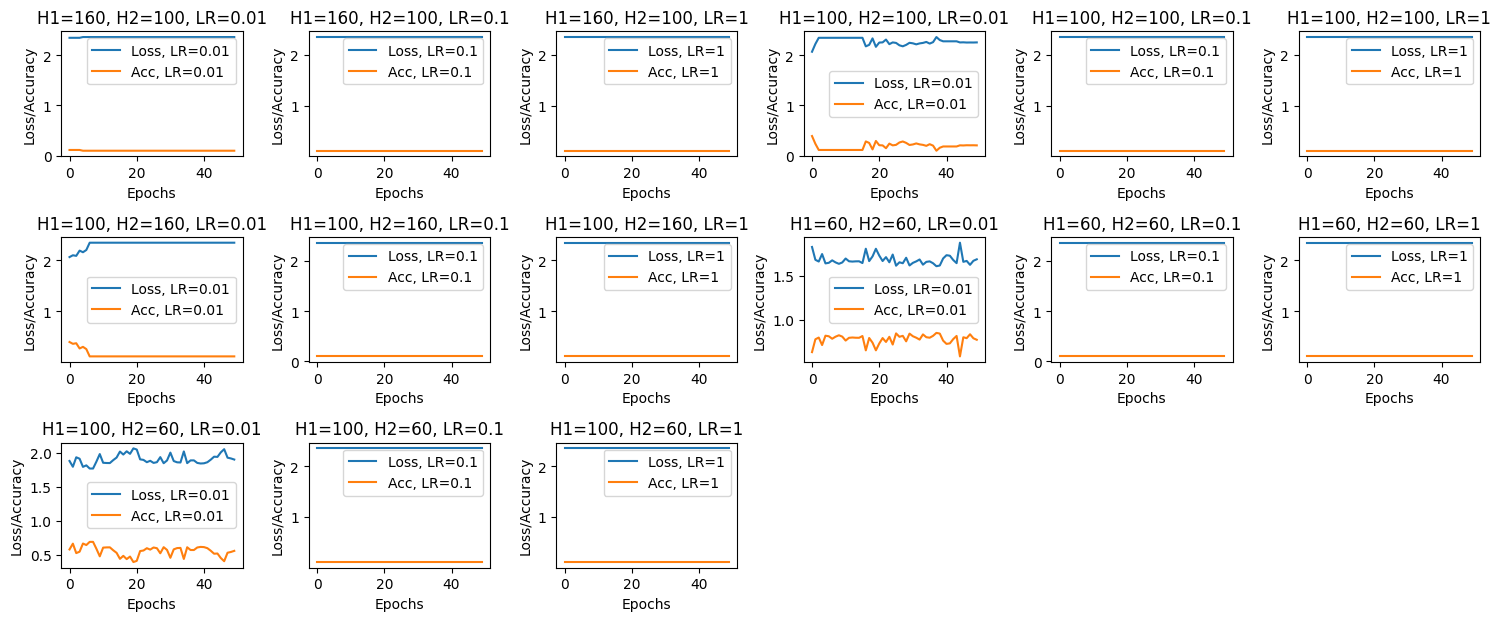

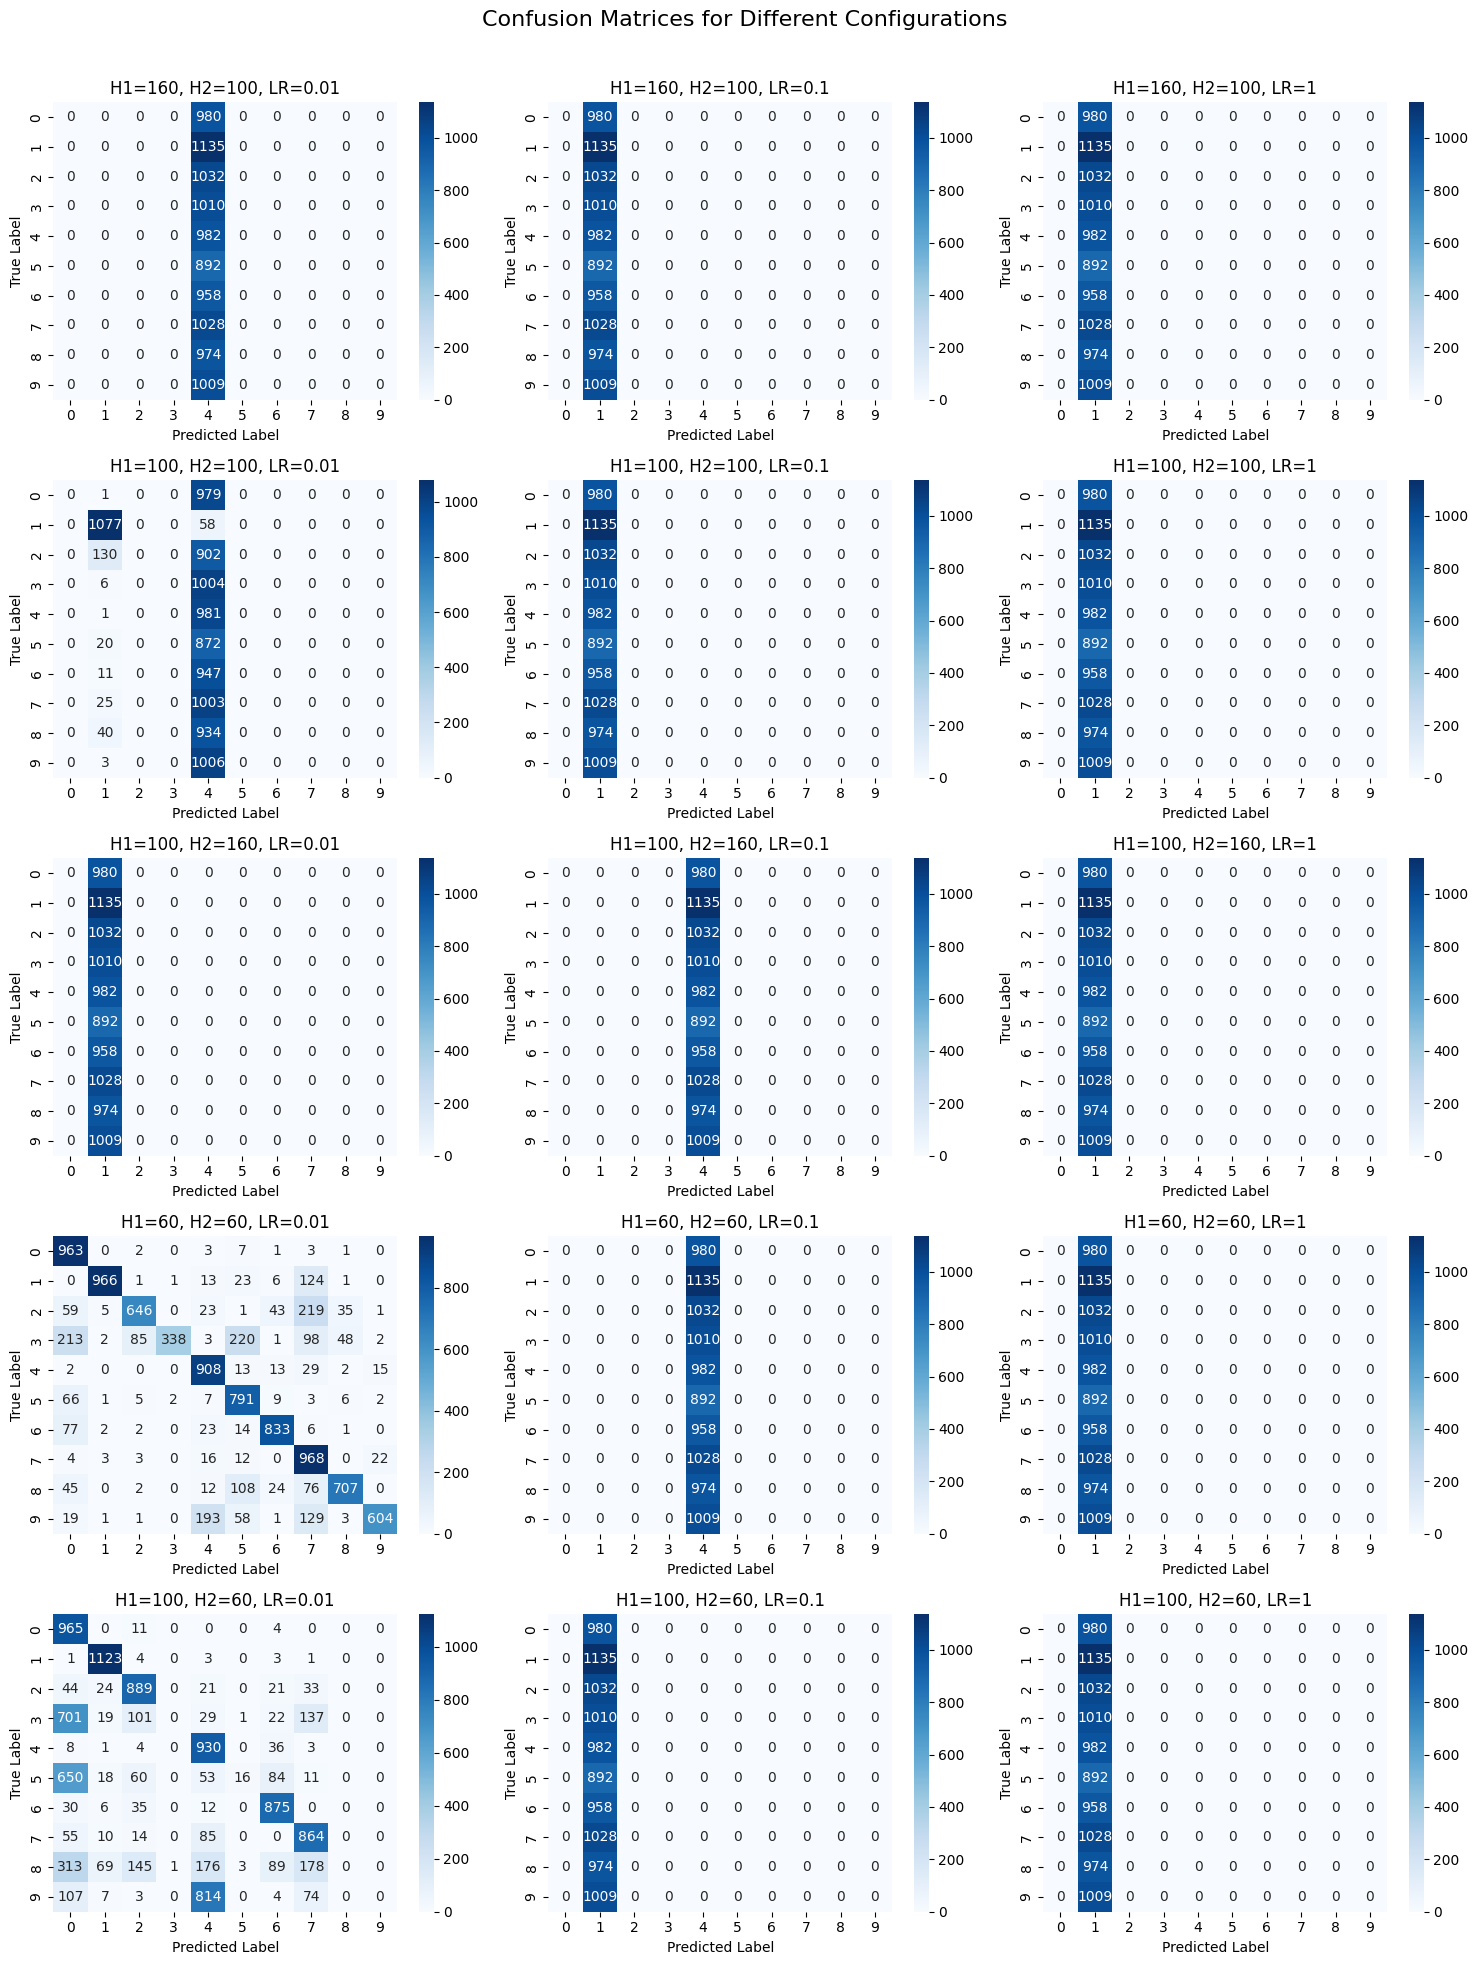

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from tensorflow.python.framework import ops

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape input data
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)  # Flattening 28x28 images
x_test = x_test.reshape(-1, 784)

# One-hot encoding for labels
y_train_onehot = np.eye(10)[y_train]
y_test_onehot = np.eye(10)[y_test]

# Define placeholders
X = tf.compat.v1.placeholder(tf.float32, [None, 784])
Y = tf.compat.v1.placeholder(tf.float32, [None, 10])

# Define model parameters initialization function
def init_weights(shape):
    return tf.Variable(tf.random.normal(shape, stddev=0.1))

# Define feed-forward pass function
def forward_propagation(X, hidden_layer_1, hidden_layer_2):
    W1 = init_weights([784, hidden_layer_1])
    b1 = tf.Variable(tf.zeros([hidden_layer_1]))

    W2 = init_weights([hidden_layer_1, hidden_layer_2])
    b2 = tf.Variable(tf.zeros([hidden_layer_2]))

    W3 = init_weights([hidden_layer_2, 10])
    b3 = tf.Variable(tf.zeros([10]))

    z1 = tf.matmul(X, W1) + b1
    a1 = tf.nn.relu(z1)

    z2 = tf.matmul(a1, W2) + b2
    a2 = tf.nn.relu(z2)

    z3 = tf.matmul(a2, W3) + b3
    output = tf.nn.softmax(z3)

    return output

# Training parameters
epochs = 50
batch_size = 10

# 5 different hidden layer size combinations
hidden_layer_sizes = [
    (160, 100), (100, 100), (100, 160), (60, 60), (100, 60)
]

# 3 different learning rates
learning_rates = [0.01, 0.1, 1]

# Generate 15 combinations
combinations = [(h1, h2, lr) for (h1, h2) in hidden_layer_sizes for lr in learning_rates]

# Store results
results = {}

# Train the model with different hidden layer and learning rate combinations
for idx, (h1, h2, lr) in enumerate(combinations):
    print(f"\nTraining with Hidden Layers: {h1}, {h2} | Learning Rate: {lr}")

    y_pred = forward_propagation(X, h1, h2)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=Y))
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=lr).minimize(loss)

    correct_pred = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Lists to store loss and accuracy per epoch
    loss_history = []
    accuracy_history = []

    # Track training time
    start_time = time.time()

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())

        for epoch in range(epochs):
            for i in range(0, x_train.shape[0], batch_size):
                batch_x = x_train[i:i+batch_size]
                batch_y = y_train_onehot[i:i+batch_size]
                sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})

            train_loss, train_acc = sess.run([loss, accuracy], feed_dict={X: x_train, Y: y_train_onehot})
            loss_history.append(train_loss)
            accuracy_history.append(train_acc)

            print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")

        # Evaluate on test set
        test_acc, y_pred_test = sess.run([accuracy, tf.argmax(y_pred, 1)], feed_dict={X: x_test, Y: y_test_onehot})
        training_time = time.time() - start_time  # Calculate training time

        print(f"Test Accuracy: {test_acc:.4f} | Training Time: {training_time:.2f} seconds")

        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred_test)

        # Store results
        results[(h1, h2, lr)] = {
            "loss_history": loss_history,
            "accuracy_history": accuracy_history,
            "test_accuracy": test_acc,
            "training_time": training_time,
            "conf_matrix": conf_matrix
        }

# Plot loss and accuracy curves
plt.figure(figsize=(15, 10))

for idx, (h1, h2, lr) in enumerate(combinations):
    plt.subplot(5, 6, idx + 1)
    plt.plot(results[(h1, h2, lr)]["loss_history"], label=f"Loss, LR={lr}")
    plt.plot(results[(h1, h2, lr)]["accuracy_history"], label=f"Acc, LR={lr}")
    plt.title(f"H1={h1}, H2={h2}, LR={lr}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle("Confusion Matrices for Different Configurations", fontsize=16)

for idx, (h1, h2, lr) in enumerate(combinations):
    ax = axes[idx // 3, idx % 3]
    sns.heatmap(results[(h1, h2, lr)]["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"H1={h1}, H2={h2}, LR={lr}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### **4. Description of Code**

The experiment is implemented using TensorFlow 1.x compatibility mode in TensorFlow 2.x. Key components include:

- **Data Preprocessing:**  
  - The MNIST dataset is loaded, normalized (pixel values scaled to [0, 1]), and reshaped into 1D arrays of size 784.  
  - Labels are converted to one-hot encoded vectors for multi-class classification.

- **Model Definition:**  
  - A feedforward neural network with two configurable hidden layers is defined.  
  - ReLU activation is used in the hidden layers, and softmax is applied in the output layer for class probabilities.  
  - Weights are initialized using a random normal distribution, and biases are initialized to zeros.

- **Training Setup:**  
  - The model is trained using the Adam optimizer and cross-entropy loss.  
  - Training is performed for 50 epochs with a batch size of 10.  
  - Placeholders are defined for inputs and labels to enable graph execution in TensorFlow 1.x.

- **Hyperparameter Tuning:**  
  - The experiment evaluates 15 configurations by varying hidden layer sizes (5 combinations) and learning rates (3 values: 0.01, 0.1, and 1).  
  - The goal is to compare how different configurations impact model performance.

- **Performance Evaluation:**  
  - Training loss and accuracy are tracked for each epoch.  
  - Test accuracy and confusion matrices are computed to evaluate prediction performance.  
  - Training time is measured to compare the computational efficiency of each configuration.  
  - Loss and accuracy curves and confusion matrices are visualized for detailed analysis.

### **5.Performance Evaluation**


Here’s the performance summary with test accuracies for all configurations:

1. **Hidden Layers: 160, 100**  
   - Learning Rate: 0.01 → Test Accuracy: **9.82%**  
   - Learning Rate: 0.1 → Test Accuracy: **11.35%**  
   - Learning Rate: 1 → Test Accuracy: **11.35%**

2. **Hidden Layers: 100, 100**  
   - Learning Rate: 0.01 → Test Accuracy: **20.58%**  
   - Learning Rate: 0.1 → Test Accuracy: **11.35%**  
   - Learning Rate: 1 → Test Accuracy: **11.35%**

3. **Hidden Layers: 100, 160**  
   - Learning Rate: 0.01 → Test Accuracy: **11.35%**  
   - Learning Rate: 0.1 → Test Accuracy: **9.82%**  
   - Learning Rate: 1 → Test Accuracy: **11.35%**

4. **Hidden Layers: 60, 60**  
   - Learning Rate: 0.01 → Test Accuracy: **77.24%**  
   - Learning Rate: 0.1 → Test Accuracy: **98.2%**  
   - Learning Rate: 1 → Test Accuracy: **11.35%**

5. **Hidden Layers: 100, 60**  
   - Learning Rate: 0.01 → Test Accuracy: **56.62%**  
   - Learning Rate: 0.1 → Test Accuracy: **11.35%**  
   - Learning Rate: 1 → Test Accuracy: **11.35%**

- **Accuracy Curves:** The model's accuracy is computed for different hyperparameter settings.
- **Loss Curve:** Used to monitor convergence and model stability over epochs.
- **Confusion Matrix:** Used to analyze classification errors.


### **6. My Comments (Limitations and Scope for Improvement)**
1. **Limitations:**
   - As we can see that the convergence is reached faster when neurons of hidden layer is increased but after certain epochs the accuracy again starts degrading
   - Fixed batch size may not be optimal for all configurations.
   - The training time is high due to a combination of large epochs and a small batch size.
   - Large learning rate reduces the accuracy and for slow learning rates it takes more time to reach at point of convergence.
2. **Scope for Improvement:**
   - Tuning other hyperparameters like batch size and optimizer along with different parameter can give better results.
   - Use of CNN architectures over BPNN can give better results.


